# Clustering using the `K-means` method to select groups of objects

In this task, we will consider the <code>K-means</code> clustering method to solve the clustering problem itself - the problem of selecting similar structures in data. We will work with the well-known <a href="http://yann.lecun.com/exdb/mnist/"><code>MNIST</code></a> dataset.

Let's load the dataset. We will use only the test part of the original set to reduce the training time of the models.

In [1]:
from keras.datasets import mnist
import warnings
warnings.filterwarnings("ignore")

(_,_), (X, y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


An example of outputting multiple objects and the corresponding class labels:

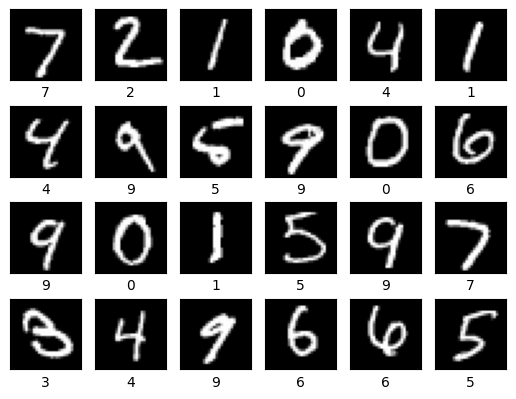

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(y[i],
                   color='black')

Enter the <code>.shape</code> of the resulting dataset

In [6]:
print(f"x shape:{X.shape}, y shape: {y.shape}")

x shape:(10000, 28, 28), y shape: (10000,)


Split the dataset into training and test samples using <code>train_test_split</code> with parameters specified in your assignment.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

Since we are talking about a known dataset, let's make <code>K-means</code> search for $10$ groups of objects. 

"Straighten" the images and train the algorithm <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html"><code>KMeans</code></a> on the training dataset with the parameters specified in your assignment.

In [18]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import numpy as np
X_train_flat = X_train.reshape(X_train.shape[0], -1)
model = KMeans(random_state=13, n_clusters=10)
model.fit(X_train_flat)

np.int64(945)

Determine the number of elements assigned to the cluster specified in your assignment.

In [19]:
cluster_labels = model.predict(X_train_flat)
cluster_labels
cluster_5_count = np.sum(cluster_labels == 5)
cluster_5_count

np.int64(945)

Construct images corresponding to centroids of the obtained clusters. To do this, `reshape` coordinates of centroids to the size $28 \times 28$ and build the resulting matrix, for example, in black and white shades.

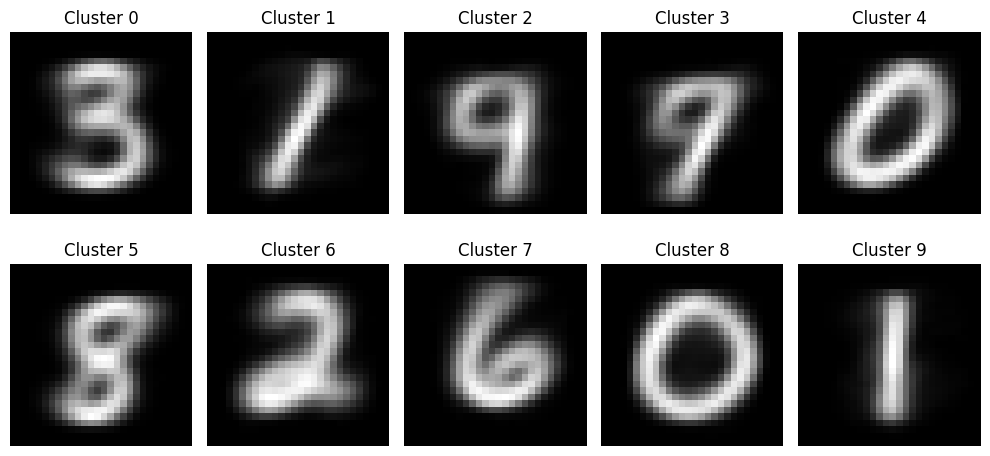

In [20]:
cluster_centers = model.cluster_centers_
centroid_images = cluster_centers.reshape(10, 28, 28)

# Display the images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centroid_images[i], cmap='gray')
    plt.title(f"Cluster {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()

It can be seen that the resulting pictures look very similar to handwritten digits. However, the clustering was not without problems. Assume which digits may be mixed up and which digits are missing.

Since the resulting clusters know nothing about the nature of the objects being clustered, the labels of the clusters may differ from the "reasonable labels". Reconstruct the correct labels using the following considerations: a cluster is assigned the label of those digits whose representatives are the majority in the cluster. Did it really help to restore fairness?

Enter the obtained cluster labels after transformation via comma and space and compare with previously constructed images based on centroids. Are your assumptions confirmed by facts?

In [29]:
from collections import Counter
cluster_to_label = {}

for cluster in range(10):
  # Find all indexes where the assigned label is equal to the cluster label
  indices_in_cluster = np.where(cluster_labels == cluster)[0]
  # Get the labels from the original training labels in the indexes specified by indices_in_cluster
  labels_in_cluster = y_train[indices_in_cluster]
  # Get the most common label in this cluster
  most_common_label = Counter(labels_in_cluster).most_common(1)[0][0]
  # Save it to cluster_to_label
  cluster_to_label[cluster] = most_common_label
cluster_output = str()
for i in cluster_to_label:
  cluster_output += (f'{cluster_to_label[i]}, ')
cluster_output

'3, 1, 4, 7, 0, 8, 2, 6, 0, 1, '

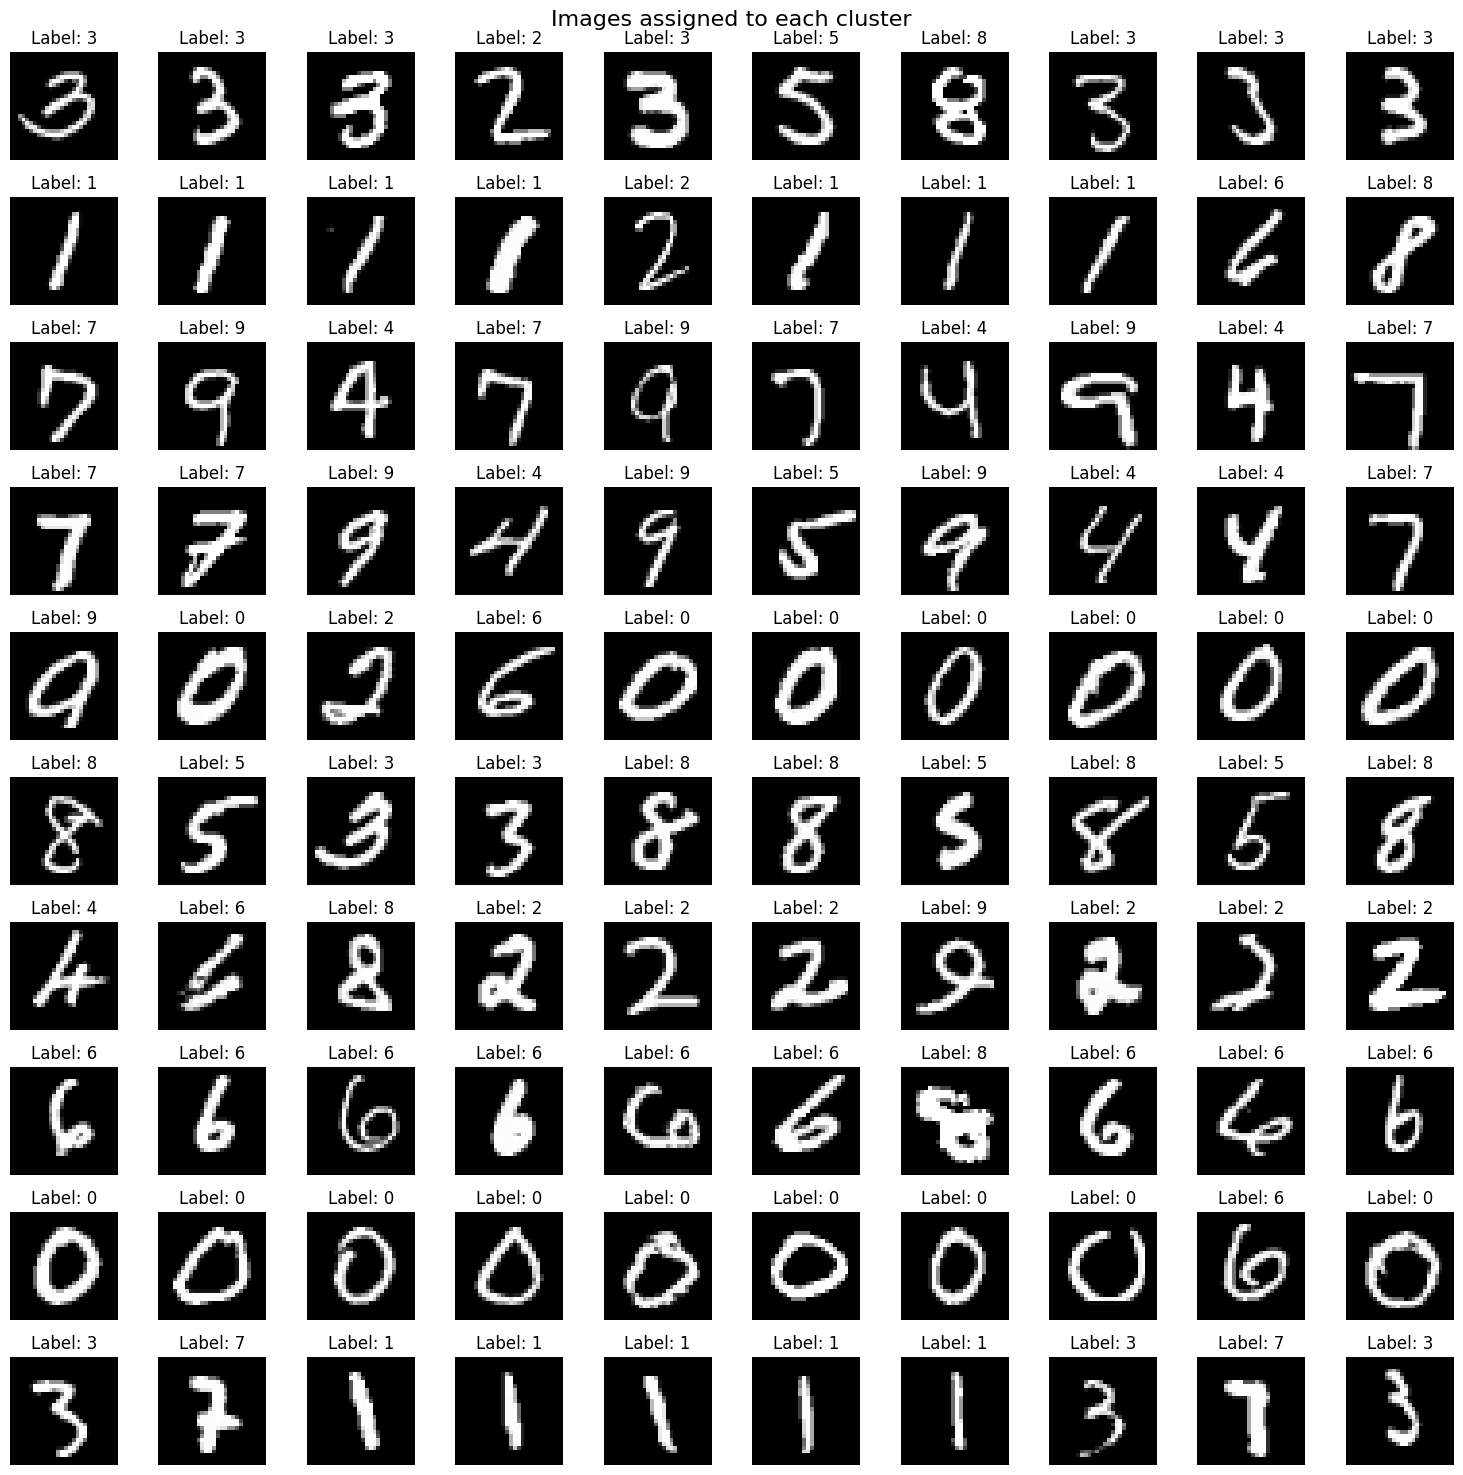

In [30]:
num_clusters = 10
fig, axes = plt.subplots(num_clusters, 10, figsize=(15,15))

for cluster in range(num_clusters):
    indices_in_cluster = np.where(cluster_labels == cluster)[0]
    for i, ax in enumerate(axes[cluster]):
        if i < len(indices_in_cluster):
          image = X_train[indices_in_cluster[i]]
          ax.imshow(image, cmap='gray')
          ax.axis('off')
          ax.set_title(f"Label: {y_train[indices_in_cluster[i]]}")
        else:
            ax.axis('off')

fig.suptitle("Images assigned to each cluster", fontsize=16)
plt.tight_layout()
plt.show()

It is reasonable to estimate something like accuracy. Assuming that all objects in the cluster have the same label as the cluster itself, compare these labels to the true labels. Calculate <code>accuracy</code> for the training dataset. We recommend using the function <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html"><code>accuracy_score</code></a> from the <code>sklearn</code> library.

In [32]:
from sklearn.metrics import accuracy_score
# Apply the mapping to the training data labels
predicted_labels = np.array([cluster_to_label[cluster] for cluster in cluster_labels])


# Calculate the accuracy
accuracy = accuracy_score(y_train, predicted_labels)
accuracy

0.6005

Use the <code>.predict()</code> method to cluster the test dataset. Rename the labels of the predicted clusters based on the transformation obtained for the training dataset.

In [34]:
X_test_flat = X_test.reshape(X_test.shape[0], -1)
test_cluster_labels = model.predict(X_test_flat)
predicted_labels = np.array([cluster_to_label[cluster] for cluster in test_cluster_labels])
accuracy = accuracy_score(y_test, predicted_labels)
accuracy

0.5915

Construct the confusion matrix.

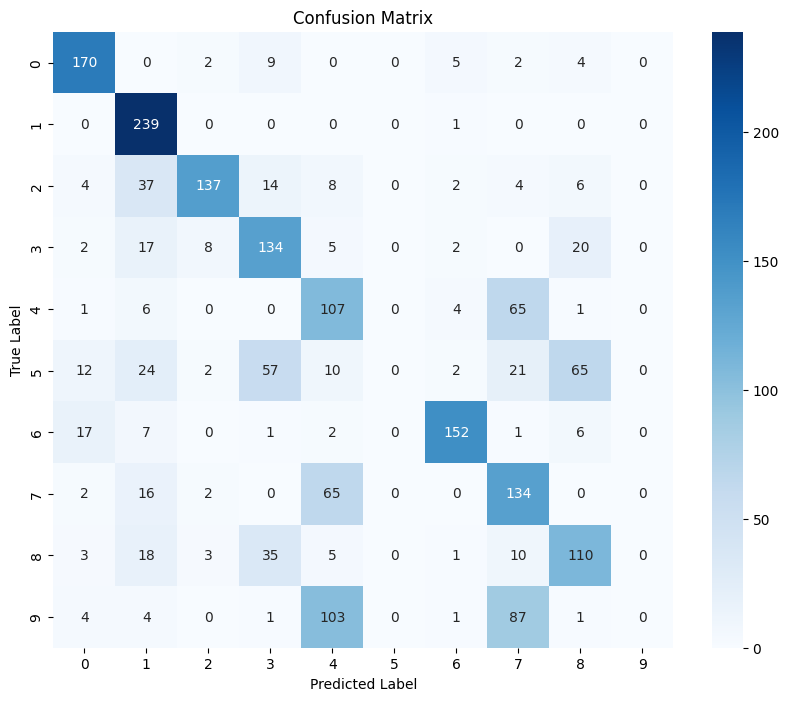

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

With which digit did the trained model most often confuse the digit specified in your assignment?

In [ ]:
4

Evaluate model on the test dataset.

In [ ]:
accuracy

It is interesting to note that we built the classifier based on clustering while we did not use any "correct answers" (except for evaluation).

How many clusters seems to be the optimal number of clusters when using the Elbow method? Consider the number of clusters from $7$ to $16$. Can you confidently determine the optimal number of clusters?

In [ ]:
# < ENTER YOUR CODE HERE > 

All this training is too long. Let's make a "horseplay" and lower the dimensionality of the data, trying to keep distances between objects. Let's see how this affects speed and accuracy.

Transform the <b>training dataset</b> using the method <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html"><code>TSNE</code></a> from the <code>sklearn</code> library with the parameters specified in your assignment.

In [37]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='random', random_state=13)
X_train_tsne = tsne.fit_transform(X_train_flat)

Cluster the resulting dataset using <code>KMeans</code> with the parameters specified in your assignment. Similar to what was done before, reassign cluster labels based on the labels of most objects within the cluster. Evaluate the accuracy of the model on the <b>training dataset</b>.

In [38]:
model = KMeans(random_state=13, n_clusters=10)
model.fit(X_train_tsne)

# Get cluster labels for each training sample
cluster_labels = model.predict(X_train_tsne)

# Create a dictionary that maps cluster to the most common digit in the cluster using the training set
cluster_to_label = {}

for cluster in range(10):
  # Find all indexes where the assigned label is equal to the cluster label
  indices_in_cluster = np.where(cluster_labels == cluster)[0]
  # Get the labels from the original training labels in the indexes specified by indices_in_cluster
  labels_in_cluster = y_train[indices_in_cluster]
  # Get the most common label in this cluster
  most_common_label = Counter(labels_in_cluster).most_common(1)[0][0]
  # Save it to cluster_to_label
  cluster_to_label[cluster] = most_common_label

# Apply the mapping to the training data labels
predicted_labels = np.array([cluster_to_label[cluster] for cluster in cluster_labels])

# Calculate the accuracy
accuracy = accuracy_score(y_train, predicted_labels)
accuracy

0.78025

The problem, however, is known. `t-SNE` is a method that does not give a rule for obtaining projections of a multidimensional space onto, for example, a two-dimensional space. Thus, when new data appears, the projections will have to be searched again.

At the same time, once again, we would like to emphasize how unsupervised learning has allowed the construction of a classifier that seems to be the result of solving the problem of supervised learning.